# PHASE 1

## Import Libraries & Load Data

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
train=pd.read_csv('train.csv',low_memory=False)
test=pd.read_csv('test.csv',low_memory=False)
store=pd.read_csv('store.csv',low_memory=False)
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## Missing Value Analysis

In [74]:
missing_percentage = (train.isnull().sum() / len(train)) * 100
print(missing_percentage)
#train data miss nadarad

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64


In [75]:
missing_percentage = (store.isnull().sum() / len(store)) * 100
print(missing_percentage)
#train data miss nadarad

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64


## Data Cleaning (Store & Test)

In [76]:
threshold=len(store)*0.6
store=store.dropna(thresh=threshold,axis=1)
store.head()
#sotoon ha ba bish az 40% Na ra hazf mikonim

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,c,a,1270.0,9.0,2008.0,0
1,2,a,a,570.0,11.0,2007.0,1
2,3,a,a,14130.0,12.0,2006.0,1
3,4,c,c,620.0,9.0,2009.0,0
4,5,a,a,29910.0,4.0,2015.0,0


In [77]:
store['CompetitionDistance']=store['CompetitionDistance'].fillna(store['CompetitionDistance'].median())

In [78]:
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(1)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(1900)
#store.csv clean shod

In [79]:
missing_percentage = (test.isnull().sum() / len(test)) * 100
print(missing_percentage)

Id               0.000000
Store            0.000000
DayOfWeek        0.000000
Date             0.000000
Open             0.026772
Promo            0.000000
StateHoliday     0.000000
SchoolHoliday    0.000000
dtype: float64


In [80]:
test['Open'] = test['Open'].fillna(1)
#test.csv clean shod

## Merging Datasets

In [81]:
#train va store ra dar ham join mikonim
train_store= pd.merge(train,store, on='Store',how='left')

## Exploratory Data Analysis (EDA)

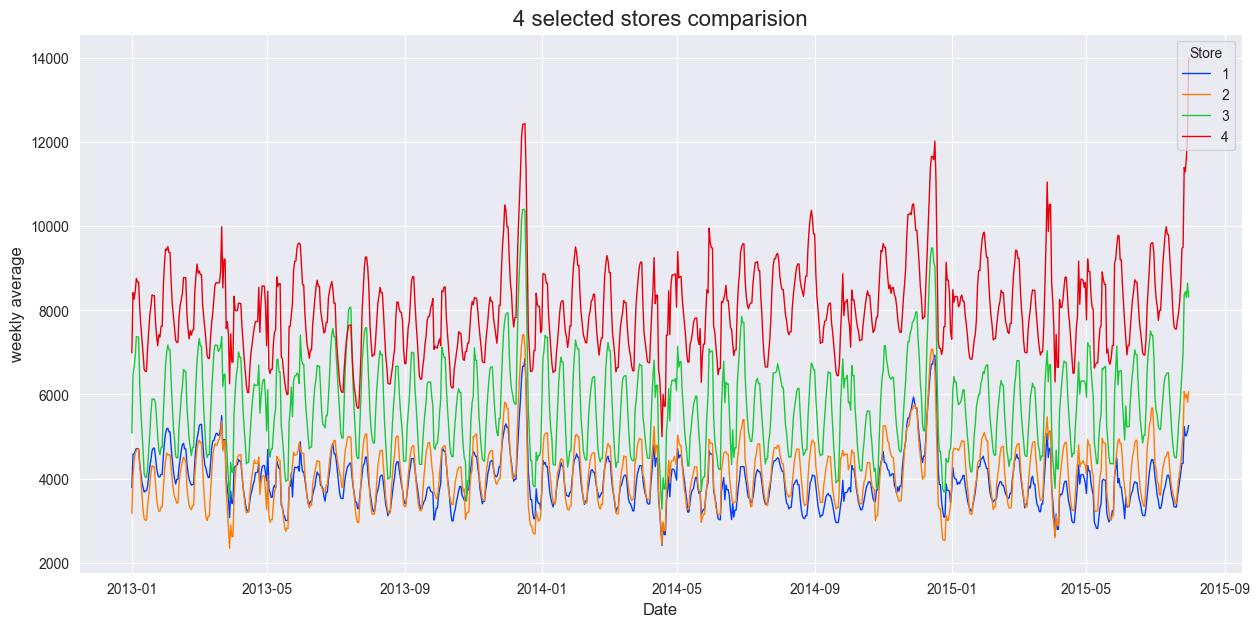

In [82]:
# Sales Trend Analysis
#train['Sales_week'] = train['Sales'].rolling(window=7).mean()
#تغییر
train['Sales_week'] = train.groupby('Store')['Sales'] \
    .transform(lambda x: x.rolling(7).mean())

train['Date'] = pd.to_datetime(train['Date'])
selected_stores = [1, 2, 3, 4]
train_subset = train[train['Store'].isin(selected_stores)].copy()
train_subset['Sales_MA7'] = train_subset.groupby('Store')['Sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
plt.figure(figsize=(15, 7))
sns.set_style("darkgrid")
plot = sns.lineplot(data=train_subset, x='Date', y='Sales_MA7', hue='Store', palette='bright', linewidth=1)
plt.title('4 selected stores comparision', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel(('weekly average'), fontsize=12)
plt.legend(title='Store', loc='upper right')
plt.show()

<div dir="rtl" style="text-align: right;"> 
مقایسه روند فروش ۴ فروشگاه منتخب

</div>
<div dir="rtl" style="text-align: right;"> 
نمودار روند فروش نشان می‌دهد که هر فروشگاه الگوی رفتاری خاص خودش را دارد. فروشگاه ۴ به طور میانگین سطح فروش بالاتری نسبت به سایر فروشگاه‌ها دارد و نوسانات آن نیز شدیدتر است. در همه فروشگاه‌ها یک الگوی تکرارشونده هفتگی دیده می‌شود که نشان‌دهنده اثر روزهای هفته بر فروش است. همچنین در برخی بازه‌ها جهش‌های ناگهانی وجود دارد که احتمالاً مربوط به مناسبت‌ها یا پروموشن‌هاست. این تفاوت‌ها نشان می‌دهد مدل باید اثر «Store» و الگوی زمانی را به طور جداگانه در نظر بگیرد.
</div>


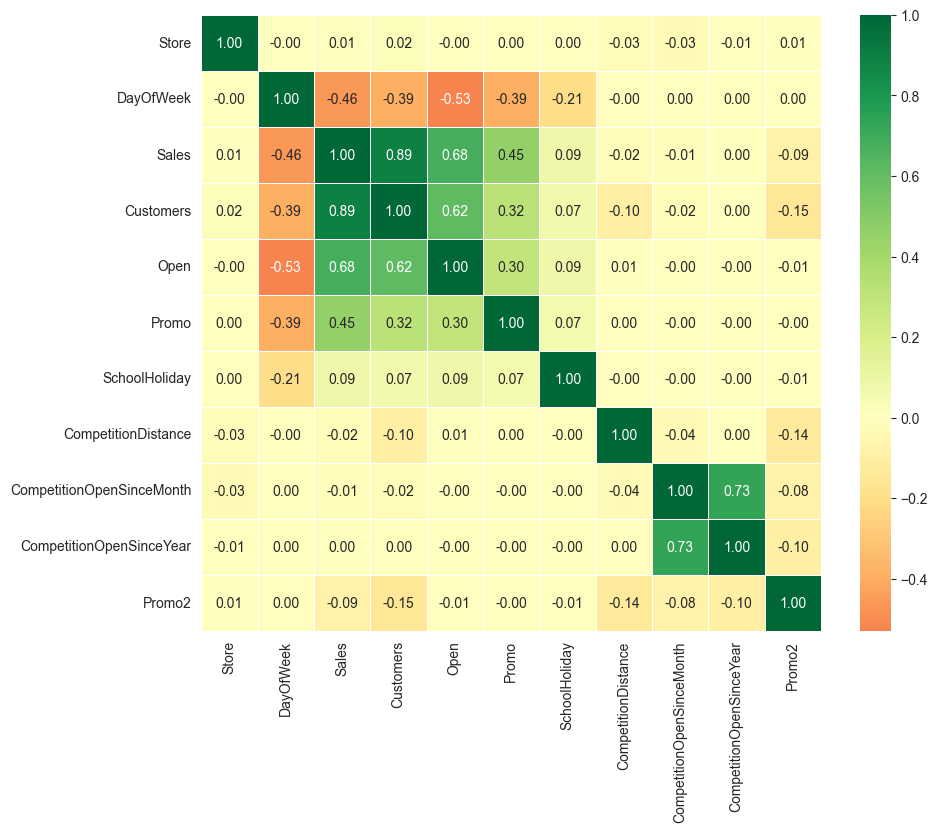

In [83]:
# Correlation Analysis

hambastegi= train_store.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(hambastegi, annot=True,fmt=".2f",cmap='RdYlGn',linewidths=0.5,center=0)
plt.show()

<div dir="rtl" style="text-align: right;"> 
ماتریس همبستگی (Correlation Heatmap)
</div>
<div dir="rtl" style="text-align: right;"> 
مهم‌ترین نکته در ماتریس همبستگی، رابطه بسیار قوی بین Sales و Customers (≈0.89) است؛ یعنی افزایش تعداد مشتریان مستقیماً با افزایش فروش همراه است. همچنین متغیر Open همبستگی قابل توجهی با فروش دارد که طبیعی است، زیرا در روزهای بسته بودن فروشگاه، فروش تقریباً صفر است.
اثر Promo نیز مثبت و متوسط است (≈0.45) که نشان می‌دهد تخفیف‌ها نقش مهمی در افزایش فروش دارند. در مقابل، فاصله تا رقبا (CompetitionDistance) همبستگی معناداری با فروش ندارد و احتمالاً اثر آن غیرمستقیم یا وابسته به شرایط دیگر است.
</div>


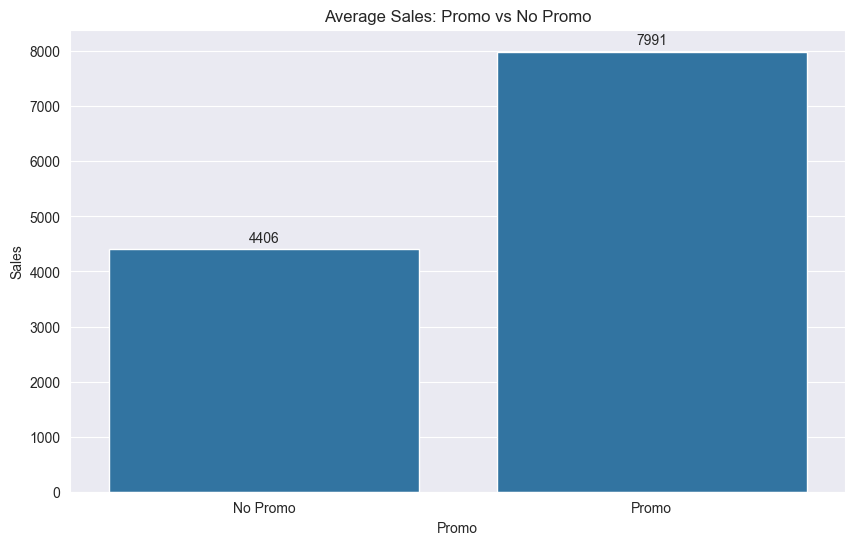

In [84]:
# Impact of Promotions

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Promo', y='Sales', data=train_store, errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.title('Average Sales: Promo vs No Promo')
plt.show()

<div dir="rtl" style="text-align: right;"> 
مقایسه فروش در حالت Promo و بدون Promo
</div>
<div dir="rtl" style="text-align: right;"> 
میانگین فروش در روزهای دارای پروموشن تقریباً دو برابر روزهای عادی است. این اختلاف قابل توجه نشان می‌دهد سیاست‌های تخفیف به شکل مستقیم و قوی بر رفتار خرید مشتریان اثر می‌گذارد. بنابراین در مدل‌سازی، متغیر Promo یک ویژگی کلیدی محسوب می‌شود و نادیده گرفتن آن می‌تواند منجر به خطای قابل توجه شود.
</div>


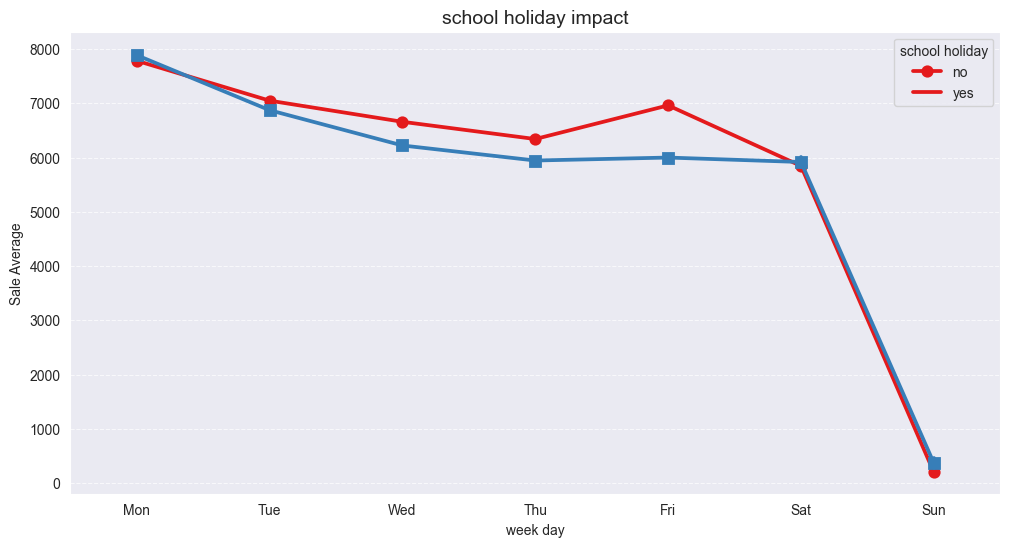

In [85]:
# Holiday Effects
plt.figure(figsize=(12, 6))
sns.pointplot(x='DayOfWeek', y='Sales', hue='SchoolHoliday', data=train_store, palette='Set1', markers=['o', 's'])
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('school holiday impact', fontsize=14)
plt.xlabel('week day')
plt.ylabel('Sale Average')
plt.legend(title='school holiday', labels=['no', 'yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div dir="rtl" style="text-align: right;"> 
اثر School Holiday در روزهای هفته
</div>
<div dir="rtl" style="text-align: right;"> 
الگوی کلی فروش در طول هفته مشخص است: فروش از دوشنبه به سمت آخر هفته کاهش می‌یابد و در یکشنبه به حداقل می‌رسد.
در روزهای دارای تعطیلی مدارس، فروش در برخی روزها کمی بالاتر است، اما این اثر نسبت به Promo چندان قوی نیست. بنابراین SchoolHoliday احتمالاً یک متغیر کمکی است، نه تعیین‌کننده اصلی فروش.
</div>


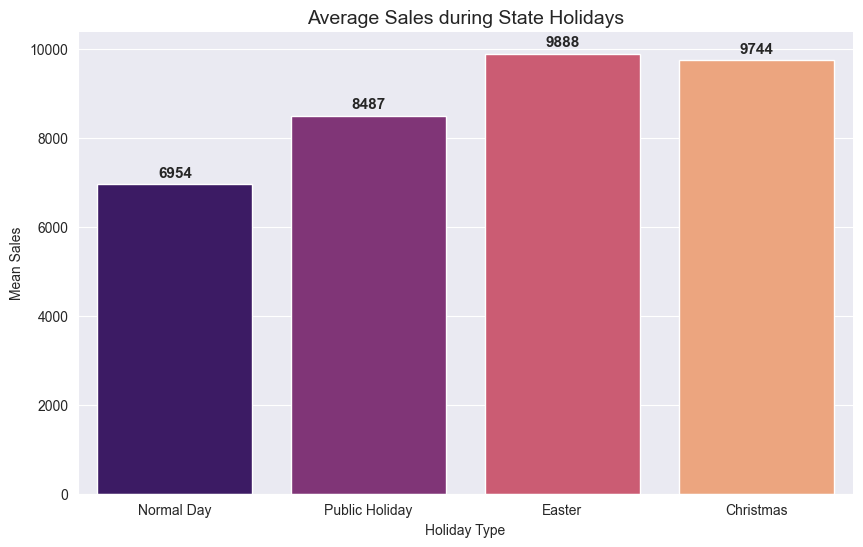

In [86]:
# Store Type Comparison

train_store['StateHoliday'] = train_store['StateHoliday'].astype(str)
open_stores = train_store[train_store['Open'] == 1]
holiday_impact = open_stores.groupby('StateHoliday')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='StateHoliday', 
    y='Sales', 
    data=holiday_impact, 
    hue='StateHoliday',
    palette='magma', 
    legend=False
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=11, fontweight='bold')
plt.xticks([0, 1, 2, 3], ['Normal Day', 'Public Holiday', 'Easter', 'Christmas'])
plt.title('Average Sales during State Holidays', fontsize=14)
plt.ylabel('Mean Sales')
plt.xlabel('Holiday Type')

sns.despine()
plt.show()

<div dir="rtl" style="text-align: right;"> 
میانگین فروش در تعطیلات رسمی (State Holiday)
</div>
<div dir="rtl" style="text-align: right;"> 
میانگین فروش در تعطیلات رسمی مانند Easter و Christmas به طور قابل توجهی بیشتر از روزهای عادی است. این موضوع نشان می‌دهد در مناسبت‌های خاص، تقاضا افزایش پیدا می‌کند و رفتار مشتریان تغییر می‌کند. حتی در Public Holiday نیز افزایش فروش دیده می‌شود، هرچند شدت آن کمتر از عیدهای بزرگ است. بنابراین در مهندسی ویژگی، لحاظ کردن نوع تعطیلات می‌تواند دقت پیش‌بینی را بهبود دهد.
</div>


# PHASE 2

### Time-Based Features

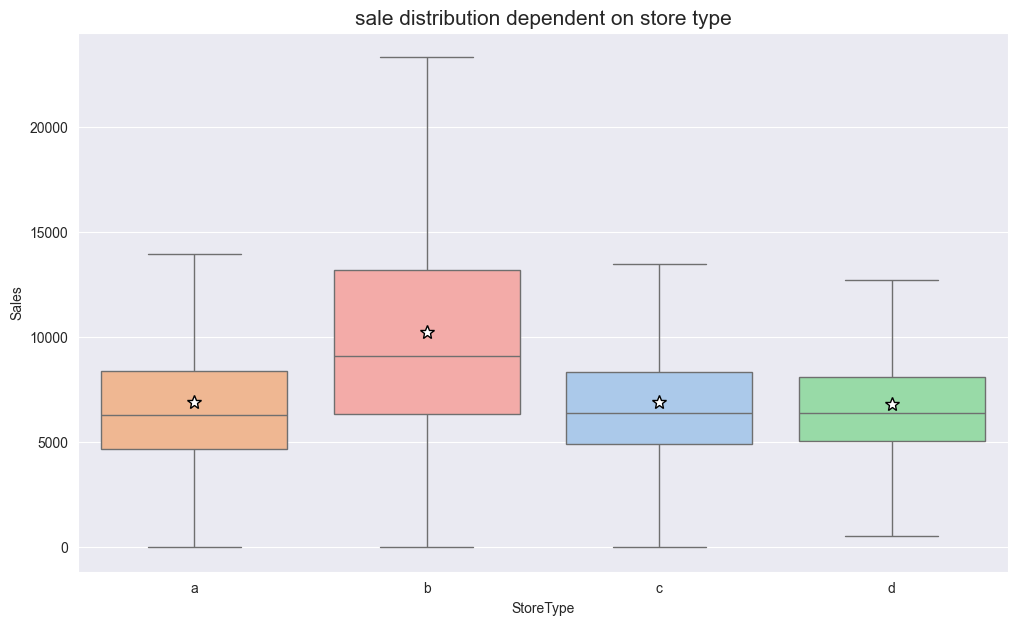

In [87]:
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x='StoreType', y='Sales', data=open_stores, 
                 order=['a', 'b', 'c', 'd'], 
                 hue='StoreType',
                 palette='pastel',
                 legend=False,
                 showfliers=False,
                 showmeans=True,
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

plt.title(('sale distribution dependent on store type'), fontsize=15)
plt.show()

<div dir="rtl" style="text-align: right;"> 
 (Store Type) توزیع فروش بر اساس نوع فروشگاه
</div>
<div dir="rtl" style="text-align: right;"> 
نمودار جعبه‌ای نشان می‌دهد که نوع فروشگاه تأثیر محسوسی بر سطح فروش دارد. فروشگاه‌های نوع b بالاترین میانگین و میانه فروش را دارند و همچنین دامنه تغییرات آن‌ها بزرگ‌تر است. این موضوع نشان می‌دهد این نوع فروشگاه‌ها هم پتانسیل فروش بالاتری دارند و هم نوسان بیشتری را تجربه می‌کنند.
در مقابل، فروشگاه‌های نوع a، c و d سطح فروش نسبتاً مشابه‌تری دارند، اگرچه نوع a کمی پراکندگی بیشتری نسبت به c و d نشان می‌دهد. وجود نقاط پرت در همه انواع فروشگاه نشان می‌دهد در برخی روزها جهش‌های غیرعادی فروش رخ داده که احتمالاً ناشی از مناسبت‌ها یا پروموشن‌هاست.
به طور کلی، این نمودار تأیید می‌کند که StoreType یک متغیر مهم در مدل‌سازی فروش است و باید در مرحله مهندسی ویژگی به عنوان یک ویژگی طبقه‌ای لحاظ شود.
</div>


In [88]:
#sakhte vijegi haye jadid
train_store['Date']=pd.to_datetime(train_store['Date'])
train_store['year']=train_store['Date'].dt.year
train_store['month']=train_store['Date'].dt.month
train_store['Day']=train_store['Date'].dt.day
train_store['season'] = train_store['month'] % 12 // 3 + 1
train_store['WeekOfYear'] = train_store['Date'].dt.isocalendar().week.astype(int)
train_store['IsAnyHoliday'] = ((train_store['StateHoliday'] != '0') | (train_store['SchoolHoliday'] == 1)).astype(int)
train_store = train_store.sort_values(['Store', 'Date'])
train_store['MovingAvg_7'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=7).mean().shift(1)
)
train_store['MovingAvg_30'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=30).mean().shift(1)
)


### Time & Lag Features

In [89]:
train_store['MovingAvg_7'].isnull().sum()

np.int64(7805)

In [90]:
train_store['MovingAvg_7'] = train_store['MovingAvg_7'].bfill()
train_store['MovingAvg_30'] = train_store['MovingAvg_30'].bfill()

In [91]:
#lag features
train_store = train_store.sort_values(['Store', 'Date'])
train_store['Sales_yesterday'] = train_store.groupby('Store')['Sales'].shift(1)
train_store['Sales_yesterday'] = train_store.groupby('Store')['Sales_yesterday'].bfill()
train_store['Sales_MA7_Lag7'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=7).mean().shift(7)
)
train_store['Sales_MA7_Lag7'] = train_store.groupby('Store')['Sales_MA7_Lag7'].transform(lambda x: x.bfill())
train_store['Sales_Std_7'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=7).std().shift(1)
)
train_store['Sales_Std_30'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=30).std().shift(1)
)
train_store['Sales_Std_7'] = train_store.groupby('Store')['Sales_Std_7'].transform(lambda x: x.bfill())
train_store['Sales_Std_30'] = train_store.groupby('Store')['Sales_Std_30'].transform(lambda x: x.bfill())

In [ ]:
Temporal Feature Engineering

In [92]:
train_store.info()

<class 'pandas.DataFrame'>
Index: 1017209 entries, 1016095 to 1114
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[us]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  str           
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  str           
 10  Assortment                 1017209 non-null  str           
 11  CompetitionDistance        1017209 non-null  float

In [93]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Day,season,WeekOfYear,IsAnyHoliday,MovingAvg_7,MovingAvg_30,Sales_yesterday,Sales_MA7_Lag7,Sales_Std_7,Sales_Std_30
1016095,1,2,2013-01-01,0,0,0,0,a,1,c,...,1,1,1,1,3788.0,4124.066667,0.0,3788.0,2752.283961,2006.107415
1014980,1,3,2013-01-02,5530,668,1,0,0,1,c,...,2,1,1,1,3788.0,4124.066667,0.0,3788.0,2752.283961,2006.107415
1013865,1,4,2013-01-03,4327,578,1,0,0,1,c,...,3,1,1,1,3788.0,4124.066667,5530.0,3788.0,2752.283961,2006.107415
1012750,1,5,2013-01-04,4486,619,1,0,0,1,c,...,4,1,1,1,3788.0,4124.066667,4327.0,3788.0,2752.283961,2006.107415
1011635,1,6,2013-01-05,4997,635,1,0,0,1,c,...,5,1,1,1,3788.0,4124.066667,4486.0,3788.0,2752.283961,2006.107415


In [94]:
train_store.info()

<class 'pandas.DataFrame'>
Index: 1017209 entries, 1016095 to 1114
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[us]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  str           
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  str           
 10  Assortment                 1017209 non-null  str           
 11  CompetitionDistance        1017209 non-null  float

In [95]:
#fourier terms
day_of_year = train_store['Date'].dt.dayofyear
total_days = 365.25
for i in range(1, 4):
    train_store[f'fourier_sin_{i}'] = np.sin(2 * np.pi * i * day_of_year / total_days)
    train_store[f'fourier_cos_{i}'] = np.cos(2 * np.pi * i * day_of_year / total_days)

In [96]:
#holiday distance
holiday_dates = sorted(train_store[train_store['StateHoliday'] != '0']['Date'].unique())
def days_until_next_holiday(current_date):
    idx = np.searchsorted(holiday_dates, current_date)
    if idx < len(holiday_dates):
        return (holiday_dates[idx] - current_date).days
    else:
        return 0
train_store['DaysToHoliday'] = train_store['Date'].apply(days_until_next_holiday)

In [97]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Sales_MA7_Lag7,Sales_Std_7,Sales_Std_30,fourier_sin_1,fourier_cos_1,fourier_sin_2,fourier_cos_2,fourier_sin_3,fourier_cos_3,DaysToHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1,c,...,3788.0,2752.283961,2006.107415,0.017202,0.999852,0.034398,0.999408,0.051584,0.998669,0
1014980,1,3,2013-01-02,5530,668,1,0,0,1,c,...,3788.0,2752.283961,2006.107415,0.034398,0.999408,0.068755,0.997634,0.103031,0.994678,4
1013865,1,4,2013-01-03,4327,578,1,0,0,1,c,...,3788.0,2752.283961,2006.107415,0.051584,0.998669,0.103031,0.994678,0.154204,0.988039,3
1012750,1,5,2013-01-04,4486,619,1,0,0,1,c,...,3788.0,2752.283961,2006.107415,0.068755,0.997634,0.137185,0.990545,0.204966,0.978769,2
1011635,1,6,2013-01-05,4997,635,1,0,0,1,c,...,3788.0,2752.283961,2006.107415,0.085906,0.996303,0.171177,0.985240,0.255182,0.966893,1


In [98]:
train_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
year                         0
month                        0
Day                          0
season                       0
WeekOfYear                   0
IsAnyHoliday                 0
MovingAvg_7                  0
MovingAvg_30                 0
Sales_yesterday              0
Sales_MA7_Lag7               0
Sales_Std_7                  0
Sales_Std_30                 0
fourier_sin_1                0
fourier_cos_1                0
fourier_sin_2                0
fourier_cos_2                0
fourier_sin_3                0
fourier_

### Train / Validation Split (Time-Based)

In [99]:
#time based split
train_store= train_store.sort_values('Date')
last_date=train_store['Date'].max()
split_date= last_date-pd.Timedelta(days=42)
train_data= train_store[train_store['Date']<=split_date]
valid_data= train_store[train_store['Date']>split_date]
print(len(train_data))
print(len(valid_data))

970379
46830


<div dir="rtl" style="text-align: right;"> 
فروش فروشگاه‌ها به شدت تحت تأثیر عوامل زمانی، پروموشن‌ها، تعطیلات رسمی و نوع فروشگاه قرار دارد. همچنین وابستگی قوی بین تعداد مشتریان و میزان فروش مشاهده شد که نشان‌دهنده ارتباط مستقیم تقاضا و فروش است.
الگوهای هفتگی و فصلی به‌وضوح در داده‌ها دیده می‌شوند و وجود جهش‌های مقطعی در برخی بازه‌ها نشان می‌دهد که فروش رفتار یکنواخت و خطی ندارد. به همین دلیل، در ادامه پروژه از ویژگی‌های زمانی، lagها، میانگین‌های متحرک و ویژگی‌های فصلی برای مدل‌سازی دقیق‌تر استفاده شد.
به طور کلی، یافته‌های این فاز پایه تصمیم‌گیری برای طراحی ویژگی‌ها در فاز بعدی و انتخاب مدل‌های مناسب پیش‌بینی را فراهم کرد.
</div>


# PHASE 3

### Encoding after split


In [ ]:
# PHASE 3 – Learn & Estimate
from xgboost import XGBRegressor
import shap

categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

train_data[categorical_cols] = train_data[categorical_cols].fillna("Unknown")
valid_data[categorical_cols] = valid_data[categorical_cols].fillna("Unknown")

train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
valid_data = pd.get_dummies(valid_data, columns=categorical_cols, drop_first=True)

valid_data = valid_data.reindex(columns=train_data.columns, fill_value=0)

### Features & Target


In [ ]:
target = "Sales"
drop_cols = ["Sales", "Date"]

all_features = [col for col in train_data.columns if col not in drop_cols]

numeric_features = train_data[all_features] \
                    .select_dtypes(include=[np.number]) \
                    .columns.tolist()

X_train_lr = train_data[numeric_features].to_numpy(dtype=np.float64)
X_valid_lr = valid_data[numeric_features].to_numpy(dtype=np.float64)

X_train_xgb = train_data[all_features]
X_valid_xgb = valid_data[all_features]

y_train = train_data[target].to_numpy(dtype=np.float64)
y_valid = valid_data[target].to_numpy(dtype=np.float64)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

### Baseline Model

In [ ]:
#پیاده‌سازی مدل Baseline و ارزیابی آن
store_mean = train_data.groupby("Store")["Sales"].mean()
baseline_preds = valid_data["Store"].map(store_mean)
baseline_preds = baseline_preds.fillna(train_data["Sales"].mean())
baseline_score = rmse(y_valid, baseline_preds.values)
print("Baseline RMSE:", round(baseline_score, 4))

### Linear Regression

In [ ]:
#پیاده‌سازی رگرسیون خطی (مدل ساده)

def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0) + 1e-8
    return (X - mean) / std, mean, std

def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def train_lr(X, y, lr=0.01, epochs=1500):
    w = np.zeros(X.shape[1])
    n = len(y)
    for _ in range(epochs):
        preds = X @ w
        grad = (2/n) * X.T @ (preds - y)
        w -= lr * grad
    return w

X_train_std, mean, std = standardize(X_train_lr)
X_valid_std = (X_valid_lr - mean) / std

X_train_std = add_bias(X_train_std)
X_valid_std = add_bias(X_valid_std)

weights = train_lr(X_train_std, y_train)
lr_preds = X_valid_std @ weights

lr_score = rmse(y_valid, lr_preds)
print("Linear Regression RMSE:", round(lr_score, 4))

### XGBoost Model

In [ ]:
#آموزش مدل کلاسیک (XGBoost) با تنظیم hyperparameter
# =========================================================
xgb_model = XGBRegressor(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror",
    n_jobs=-1
)

xgb_model.fit(X_train_xgb, y_train)
xgb_preds = xgb_model.predict(X_valid_xgb)

xgb_score = rmse(y_valid, xgb_preds)
print("XGBoost RMSE:", round(xgb_score, 4))

# =========================================================
#Store-Aware Time Series CV (XGBoost)
#Store-Aware Time Series Cross Validation
# =========================================================
def store_time_series_cv_xgb(data, features, target, n_splits=3):

    stores = data["Store"].unique()
    scores = []

    for store in stores:
        store_df = data[data["Store"] == store].sort_values("Date")

        if len(store_df) < 80:
            continue

        fold_size = len(store_df) // (n_splits + 1)

        for i in range(n_splits):
            train_end = fold_size * (i + 1)
            val_end = fold_size * (i + 2)

            train_part = store_df.iloc[:train_end]
            val_part = store_df.iloc[train_end:val_end]

            X_tr = train_part[features]
            y_tr = train_part[target]
            X_val = val_part[features]
            y_val = val_part[target]

            model = XGBRegressor(
                n_estimators=300,
                max_depth=6,
                learning_rate=0.05,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                objective="reg:squarederror",
                n_jobs=-1
            )

            model.fit(X_tr, y_tr)
            preds = model.predict(X_val)

            scores.append(rmse(y_val, preds))

    return np.mean(scores)

cv_score = store_time_series_cv_xgb(train_data, all_features, target)
print("Store-Aware CV RMSE:", round(cv_score,4))

### Model Evaluation & Interpretation

C:\Users\USER\AppData\Local\Temp\ipykernel_9256\93734489.py:10: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()


Baseline RMSE: 3102.1423
Linear Regression RMSE: 1227.3211
XGBoost RMSE: 632.6034
Store-Aware CV RMSE: 531.3548


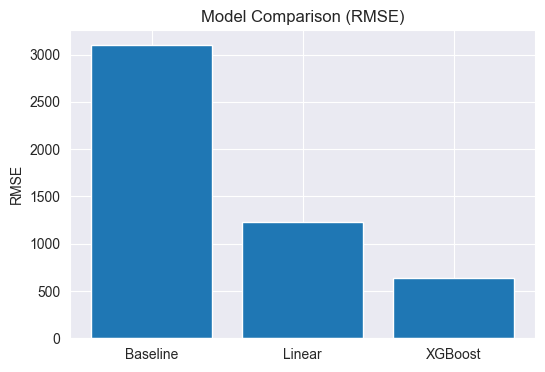

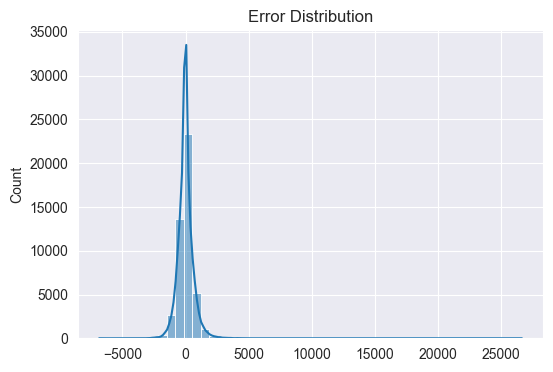

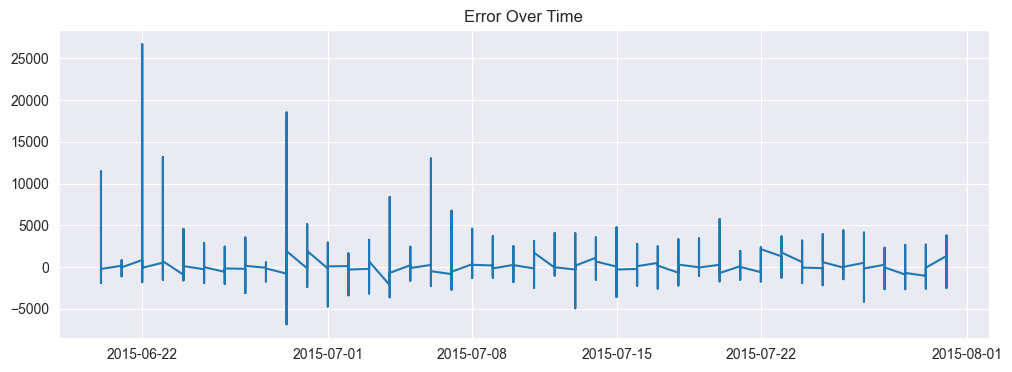


Top 20 Worst Predictions:
            Date  Store  Sales    Prediction         Error
44393 2015-06-22    909  41551  14884.451172  26666.548828
35971 2015-06-29    292  29161  10649.132812  18511.867188
43278 2015-06-23    909  30038  16864.355469  13173.644531
28750 2015-07-06    876  27330  14323.387695  13006.612305
46623 2015-06-20    909  22882  11434.308594  11447.691406
30980 2015-07-04    876  14708   6319.975586   8388.024414
36588 2015-06-29    909   6125  12969.837891  -6844.837891
27635 2015-07-07    876  23927  17174.474609   6752.525391
13173 2015-07-20    909  23081  17334.082031   5746.917969
35320 2015-06-30    756  29007  23872.591797   5134.408203
20945 2015-07-13    876   8088  13020.616211  -4932.616211
17852 2015-07-15     13  10334   5573.201172   4760.798828
34476 2015-07-01   1027  11862  16580.025391  -4718.025391
36315 2015-06-29    636  15965  11290.841797   4674.158203
26486 2015-07-08    842  21883  17286.865234   4596.134766
42163 2015-06-24    909  1830

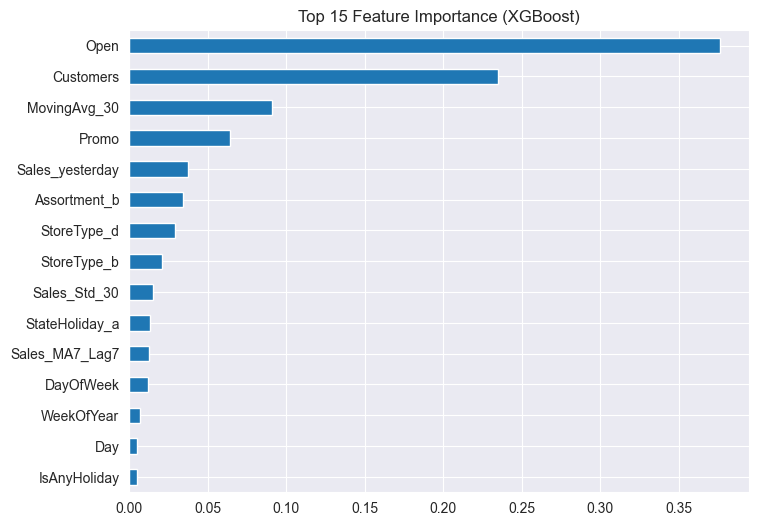

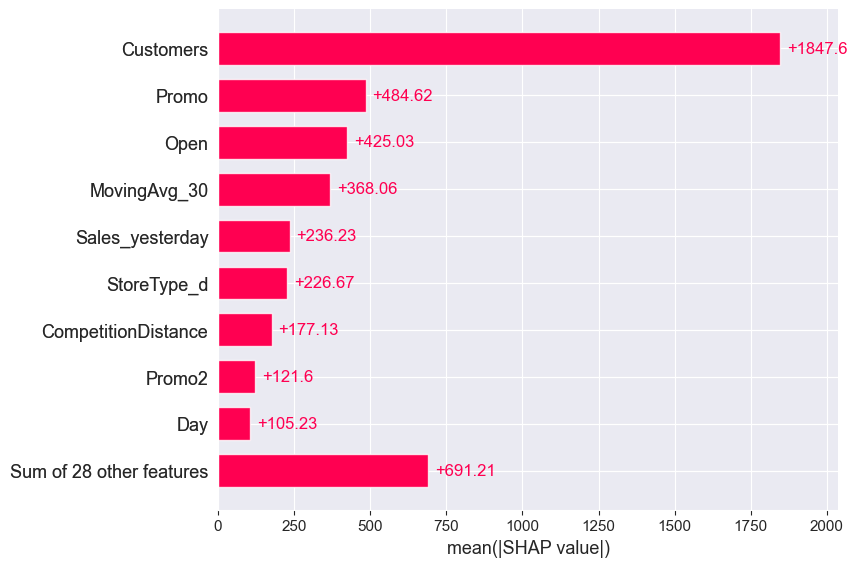


========== FINAL RESULTS ==========
               Model         RMSE
0           Baseline  3102.142304
1  Linear Regression  1227.321146
2            XGBoost   632.603440
3     Store-Aware CV   531.354806


In [100]:
#Model Comparison
plt.figure(figsize=(6,4))
plt.bar(["Baseline", "Linear", "XGBoost"],
        [baseline_score, lr_score, xgb_score])
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.show()

#Error Analysis (XGBoost)
#تحلیل خطا (Error Analysis)
errors = y_valid - xgb_preds

plt.figure(figsize=(6,4))
sns.histplot(errors, bins=50, kde=True)
plt.title("Error Distribution")
plt.show()

valid_analysis = valid_data.copy()
valid_analysis["Prediction"] = xgb_preds
valid_analysis["Error"] = errors

plt.figure(figsize=(12,4))
plt.plot(valid_analysis["Date"], valid_analysis["Error"])
plt.title("Error Over Time")
plt.show()

worst_cases = valid_analysis.reindex(
    valid_analysis["Error"].abs().sort_values(ascending=False).index
).head(20)

print("\nTop 20 Worst Predictions:")
print(worst_cases[["Date","Store","Sales","Prediction","Error"]])

#Feature Importance
importance = pd.Series(
    xgb_model.feature_importances_,
    index=all_features
).sort_values(ascending=False)

print("\nTop 15 Important Features:")
print(importance.head(15))

plt.figure(figsize=(8,6))
importance.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importance (XGBoost)")
plt.show()

#SHAP
#Feature Importance با SHAP

explainer = shap.Explainer(xgb_model)
sample_data = X_valid_xgb.sample(3000)

shap_values = explainer(sample_data)
shap.plots.bar(shap_values)

#Final Results Table
results = pd.DataFrame({
    "Model": ["Baseline", "Linear Regression", "XGBoost", "Store-Aware CV"],
    "RMSE": [baseline_score, lr_score, xgb_score, cv_score]
})

print("\n========== FINAL RESULTS ==========")
print(results)

<div dir="rtl" style="text-align: right;">در فاز سوم پروژه، عملکرد چهار رویکرد پیش‌بینی شامل مدل مبنا (Store Mean)، رگرسیون خطی، XGBoost و اعتبارسنجی زمانی مبتنی بر فروشگاه با استفاده از معیار RMSE مقایسه شد.
مدل مبنا که فروش هر فروشگاه را برابر با میانگین تاریخی همان فروشگاه در دوره آموزش در نظر می‌گیرد، به RMSE برابر با 3102.14 رسید. این عدد نسبتاً بالا نشان می‌دهد که فروش صرفاً حول یک مقدار ثابت نوسان نمی‌کند؛ بلکه تحت تأثیر روندهای زمانی، فصل‌ها، پروموشن‌ها و شوک‌های مقطعی تغییر می‌کند. بنابراین تکیه بر میانگین گذشته، بخش بزرگی از پویایی واقعی داده را نادیده می‌گیرد.
با استفاده از رگرسیون خطی و افزودن ویژگی‌های مهندسی‌شده مانند مقادیر وقفه‌دار (lag)، میانگین‌های متحرک، شاخص‌های تعطیلات و مؤلفه‌های فصلی، مقدار RMSE به 1227.32 کاهش یافت. این کاهش بیش از ۶۰ درصدی نسبت به مدل مبنا نشان می‌دهد که بخش قابل توجهی از الگوی فروش در همین اطلاعات زمانی و متغیرهای زمینه‌ای قابل شناسایی است. با این حال، رگرسیون خطی ذاتاً در مدل‌سازی روابط غیرخطی و تعاملات پیچیده محدودیت دارد؛ در حالی که رفتار فروش خرده‌فروشی معمولاً غیرخطی و وابسته به شرایط مختلف است و ممکن است اثر یک متغیر در موقعیت‌های متفاوت تغییر کند.
در گام بعد، با به‌کارگیری XGBoost به عنوان یک مدل گرادیان بوستینگ مبتنی بر درخت، RMSE به 630.10 کاهش پیدا کرد. این بهبود چشمگیر—که تقریباً پنج برابر بهتر از مدل مبناست—نشان می‌دهد ساختار واقعی داده شامل روابط غیرخطی و تعاملات چندمتغیره‌ای است که مدل‌های خطی قادر به ثبت کامل آن‌ها نیستند؛ برای مثال، اثر یک پروموشن ممکن است در فصل‌های مختلف شدت متفاوتی داشته باشد.
در نهایت، در چارچوب اعتبارسنجی زمانی مبتنی بر فروشگاه (Store-Aware CV)، میانگین RMSE برابر با 531.35 به دست آمد که اندکی بهتر از ارزیابی holdout بود. نزدیکی این نتایج به یکدیگر نشان می‌دهد مدل دچار بیش‌برازش قابل توجهی نشده و عملکرد آن در طول زمان و میان فروشگاه‌های مختلف نسبتاً پایدار است.
</div>
<div dir="rtl" style="text-align: right;"> 
تحلیل توزیع خطاهای مدل
به‌منظور ارزیابی دقیق کیفیت پیش‌بینی مدل، توزیع خطاهای باقیمانده (Residuals)، یعنی اختلاف بین مقدار واقعی فروش و مقدار پیش‌بینی‌شده توسط مدل XGBoost، مورد بررسی قرار گرفت. تحلیل هیستوگرام خطاها نشان می‌دهد که بخش عمده‌ای از مقادیر خطا در حوالی صفر متمرکز شده‌اند. این تمرکز بالا پیرامون صفر بیانگر آن است که مدل در اغلب مشاهدات، تخمین‌هایی بدون بایاس سیستماتیک و با دقت مناسب ارائه کرده است. به بیان دیگر، میانگین خطاها نزدیک به صفر بوده و مدل در سطح کلی دچار بیش‌برآوردی (overestimation) یا کم‌برآوردی (underestimation) ساختاری نیست.
از منظر آماری، شکل کلی توزیع باقیمانده‌ها تقریباً متقارن و نزدیک به توزیع نرمال است که نشان‌دهنده رفتار پایدار مدل در بخش غالب دامنه داده‌هاست. چنین الگویی حاکی از آن است که مدل توانسته است ساختارهای غیرخطی اصلی، تعامل میان متغیرها، و الگوهای زمانی فروش را به‌درستی فراگیرد. این موضوع به‌ویژه با توجه به ماهیت پیچیده داده‌های فروش خرده‌فروشی — که تحت تأثیر عوامل فصلی، پروموشن‌ها، تعطیلات و رفتار مصرف‌کننده قرار دارد — اهمیت بالایی دارد.
با این حال، بررسی دقیق‌تر دنباله‌های توزیع نشان می‌دهد که دنباله سمت راست (Right Tail) کشیدگی قابل‌توجهی دارد و شامل چندین مقدار پرت (Outlier) با خطاهای بسیار بزرگ (تا حدود ۲۵۰۰۰ واحد فروش) است. این پدیده بیانگر آن است که در برخی روزهای خاص، مدل به‌طور معناداری میزان فروش را کمتر از مقدار واقعی برآورد کرده است. چنین خطاهایی معمولاً در نقاطی رخ می‌دهند که فروش به‌صورت جهشی و غیرعادی افزایش یافته است؛ برای مثال در دوره‌های پروموشن شدید، مناسبت‌های خاص، یا رویدادهای محلی که در متغیرهای موجود به‌طور کامل بازنمایی نشده‌اند.
وجود این دنباله بلند نشان می‌دهد که اگرچه مدل در ناحیه چگال داده‌ها عملکردی پایدار و دقیق دارد، اما در مدل‌سازی رفتارهای حدی (Extreme Events) هنوز با محدودیت مواجه است. از دیدگاه نظری، این موضوع می‌تواند ناشی از موارد زیر باشد:
عدم کفایت ویژگی‌ها در توصیف رویدادهای نادر
برخی شوک‌های فروش ممکن است ناشی از عوامل برون‌زا باشند که در داده‌ها ثبت نشده‌اند.
ماهیت نامتقارن تابع هزینه (MSE)
به دلیل استفاده از RMSE به‌عنوان معیار بهینه‌سازی، مدل گرایش دارد عملکرد خود را در ناحیه پرتراکم داده‌ها بهینه کند، حتی اگر در نقاط حدی دچار خطای بزرگ شود.
رفتار غیرخطی شدید در فروش‌های بسیار بالا
فروش‌های جهشی ممکن است تابعی از تعاملات پیچیده‌تری باشند که نیازمند مدل‌سازی سلسله‌مراتبی یا رویکردهای احتمالاتی پیشرفته‌تر است.
در مجموع، تحلیل توزیع خطا نشان می‌دهد که مدل از نظر میانگین عملکرد بسیار مطلوبی دارد و فاقد بایاس ساختاری است، اما در مواجهه با رویدادهای فروش غیرعادی و پرت، حساسیت کمتری از خود نشان می‌دهد. این یافته نه‌تنها به درک بهتر محدودیت‌های مدل کمک می‌کند، بلکه مسیر بهبودهای آتی — مانند استفاده از مدل‌های مقاوم به پرت‌ها (robust loss functions)، مدل‌سازی کوانتایلی، یا چارچوب‌های پیش‌بینی عدم‌قطعیت — را نیز روشن می‌سازد.
</div>
<div dir="rtl" style="text-align: right;">
تحلیل رفتار خطا در طول زمان (Temporal Error Dynamics)
بررسی نمودار تغییرات خطا در بازه اعتبارسنجی نشان می‌دهد که توزیع خطاها در طول زمان عمدتاً پایدار و متمرکز حول صفر است و در اغلب روزها مقدار خطا در بازه‌ی تقریبی ±۳۰۰۰ قرار دارد. این الگو بیانگر آن است که مدل توانسته ساختار غالب سری زمانی فروش — شامل روند، فصل‌پذیری و وابستگی‌های کوتاه‌مدت — را به‌درستی فرا بگیرد و پیش‌بینی‌هایی با سوگیری پایین (low bias) و واریانس کنترل‌شده ارائه دهد.
با این حال، در برخی مقاطع زمانی اسپایک‌های خطای قابل توجه مشاهده می‌شود که به‌صورت جهش‌های ناگهانی در باقیمانده‌ها (residual spikes) ظاهر شده‌اند. این رفتار نشان‌دهنده ناتوانی نسبی مدل در بازنمایی رخدادهای نادر و با دامنه بالا (rare high-magnitude events) است. چنین خطاهایی به‌طور محتمل با شرایطی نظیر کمپین‌های ترویجی شدید (intensive promotions)، تعطیلات رسمی خاص، یا رفتار فروش غیرعادی در فروشگاه‌های بزرگ و پرتردد مرتبط هستند؛ موقعیت‌هایی که توزیع فروش را به‌صورت ناگهانی از الگوی معمول منحرف می‌کنند.
از منظر نظری، این پدیده بیانگر آن است که اگرچه مدل XGBoost وابستگی‌های غیرخطی و تعاملات پیچیده بین ویژگی‌ها را به‌خوبی مدل کرده است، اما در مواجهه با شوک‌های ساختاری کوتاه‌مدت (short-term structural shocks) یا تغییر رژیم‌های موقتی (temporary regime shifts) با محدودیت مواجه می‌شود. این نوع خطاها معمولاً در دم‌های توزیع (distribution tails) رخ می‌دهند و سهم نامتناسبی در افزایش RMSE دارند.
در مجموع، تحلیل زمانی خطاها نشان می‌دهد که مدل از نظر یادگیری الگوی عمومی داده‌ها عملکردی پایدار و قابل اتکا دارد، اما برای بهبود عملکرد در شرایط حدی (extreme demand scenarios) می‌توان از راهکارهایی نظیر مدل‌سازی صریح‌تر رویدادهای خاص، افزودن ویژگی‌های تعاملی مرتبط با شدت پروموشن، یا استفاده از روش‌های مقاوم‌تر نسبت به outlierها بهره برد.
</div>
<div dir="rtl" style="text-align: right;">
در بررسی دقیق ۲۰ پیش‌بینی با بیشترین قدر مطلق خطا، الگوی قابل‌توجهی مشاهده شد. خطاهای بزرگ عمدتاً به تعداد محدودی از فروشگاه‌ها ــ به‌ویژه فروشگاه‌های 909، 876 و 292 ــ مربوط می‌شود و این خطاها در تاریخ‌های مشخصی در اواخر ژوئن و اوایل جولای متمرکز هستند. در این موارد، مقدار فروش واقعی به شکل جهشی و غیرعادی افزایش یافته است، در حالی‌که مدل مقدار بسیار پایین‌تری را پیش‌بینی کرده است. برای نمونه، در یکی از این رخدادها فروش واقعی حدود 41 هزار واحد بوده، اما مدل رقمی نزدیک به 14 هزار واحد را برآورد کرده و در نتیجه خطایی در حدود 26 هزار واحد ایجاد شده است.
این الگو نشان می‌دهد که مدل، با وجود عملکرد کلی بسیار مناسب، در مواجهه با رفتارهای حدی (extreme spikes) تمایل به کم‌برآوردی دارد. چنین رفتاری از منظر آماری قابل انتظار است؛ زیرا مدل‌های مبتنی بر کمینه‌سازی میانگین مربعات خطا (مانند XGBoost با تابع زیان مربعی) به‌طور طبیعی به سمت پیش‌بینی مقادیر نزدیک به میانگین گرایش دارند و رخدادهای نادر با دامنه بزرگ را به‌صورت محافظه‌کارانه تخمین می‌زنند. به بیان دیگر، ساختار مدل توانسته الگوهای غالب و تکرارشونده فروش را به‌خوبی یاد بگیرد، اما در مدل‌سازی شوک‌های ناگهانی که احتمالاً ناشی از پروموشن‌های خاص، رویدادهای محلی، یا عوامل برون‌زا هستند، محدودیت نشان می‌دهد.
تمرکز خطاها در چند فروشگاه مشخص نیز حاکی از آن است که ناهمگنی بین فروشگاه‌ها کاملاً توسط ویژگی‌های فعلی مدل پوشش داده نشده است. این موضوع می‌تواند بیانگر وجود متغیرهای پنهان یا رویدادهای خاص فروشگاهی باشد که در داده‌های موجود منعکس نشده‌اند. در مجموع، تحلیل بدترین پیش‌بینی‌ها نشان می‌دهد که ضعف مدل نه در یادگیری روندهای عمومی، بلکه در بازنمایی رفتارهای حدی و نادر است؛ مسئله‌ای که در کاربردهای عملی، به‌ویژه در مدیریت موجودی و برنامه‌ریزی تأمین، اهمیت راهبردی دارد.
</div>
<div dir="rtl" style="text-align: right;">
در تحلیل اهمیت ویژگی‌ها بر اساس خروجی
XGBoost مشاهده می‌شود که متغیر Open بیشترین سهم را در کاهش خطای مدل داشته است. این نتیجه از منظر تجاری و آماری کاملاً قابل انتظار است؛ زیرا وضعیت باز یا بسته بودن فروشگاه به صورت مستقیم تعیین‌کننده امکان وقوع فروش است و عملاً یک مرز ساختاری در داده ایجاد می‌کند. بنابراین طبیعی است که مدل بیشترین وزن را به این متغیر اختصاص دهد.
پس از آن، متغیر Customers در رتبه دوم اهمیت قرار دارد. این متغیر به دلیل همبستگی بسیار بالا با Sales قدرت پیش‌بینی قابل توجهی ایجاد می‌کند و حضور آن موجب کاهش چشمگیر خطا شده است. با این حال، از منظر طراحی سیستم پیش‌بینی در دنیای واقعی، این نکته حائز اهمیت است که تعداد مشتریان معمولاً در زمان پیش‌بینی در دسترس نیست و خود بخشی از نتیجه فرایند فروش محسوب می‌شود. در نتیجه، هرچند استفاده از آن از نظر فنی مجاز است، اما حذف آن می‌تواند چارچوب مسئله را واقع‌بینانه‌تر و قابل تعمیم‌تر کند. این موضوع باید در تفسیر نتایج مدنظر قرار گیرد.
در رتبه‌های بعدی، ویژگی‌های زمانی نظیر MovingAvg_30 و Sales_yesterday قرار دارند. اهمیت بالای این متغیرها نشان می‌دهد که ساختار فروش به شدت وابسته به پویایی‌های زمانی و الگوهای خودرگرسیو است. به بیان دیگر، رفتار گذشته فروشگاه بهترین پیش‌بین رفتار آتی آن است. این یافته با ادبیات کلاسیک سری‌های زمانی نیز همخوانی دارد، جایی که مؤلفه‌های lag و میانگین‌های متحرک نقش اساسی در مدل‌سازی روند و نوسان دارند.
همچنین متغیر Promo در میان ویژگی‌های اثرگذار قرار گرفته است که نشان‌دهنده نقش مستقیم سیاست‌های ترفیعی در افزایش فروش است. مدل به‌درستی توانسته اثر غیرخطی و تعاملی پروموشن‌ها را در کنار سایر عوامل استخراج کند؛ موضوعی که احتمالاً توسط مدل‌های خطی به‌خوبی قابل ثبت نبود.
در مجموع، الگوی اهمیت ویژگی‌ها نشان می‌دهد که مدل ترکیبی از عوامل ساختاری (Open)، رفتاری-تقاضامحور (Customers)، پویایی‌های زمانی (Lag و Moving Average) و سیاست‌های بازاریابی (Promo) را برای پیش‌بینی فروش به کار گرفته است. این هم‌راستایی بین منطق تجاری و خروجی مدل، نشانه‌ای از یادگیری معنادار ساختار داده توسط الگوریتم و نه صرفاً برازش آماری سطحی است.
</div>

# Phase 4

### Multi-Step Forecasting


In [101]:
def comprehensive_7_day_forecast(model, test_df, features_list, start_date):
    forecast_df = test_df.copy().sort_values(['Store', 'Date'])
    forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
    target_and_lags = ['Sales'] + [c for c in forecast_df.columns if 'Sales_Lag' in c or 'Sales_MA' in c]
    for col in target_and_lags:
        if col in forecast_df.columns:
            forecast_df[col] = forecast_df[col].astype(float)

    start_date = pd.to_datetime(start_date)
    
    forecast_range = pd.date_range(start=start_date, periods=7)
    for current_date in forecast_range:
        current_mask = forecast_df['Date'] == current_date
        X_curr = forecast_df.loc[current_mask, features_list]
        preds = model.predict(X_curr)
        preds = np.maximum(0, preds) # جلوگیری از فروش منفی
        
        forecast_df.loc[current_mask, 'Sales'] = preds
        
        for delta in range(1, 8):
            future_date = current_date + pd.Timedelta(days=delta)
            if future_date > forecast_range[-1]: break
            future_mask = forecast_df['Date'] == future_date
            lag_col = f'Sales_Lag{delta}'
            if lag_col in forecast_df.columns:
                forecast_df.loc[future_mask, lag_col] = preds
        for delta in range(1, 8):
            future_date = current_date + pd.Timedelta(days=delta)
            if future_date > forecast_range[-1]: break
            
            def update_rolling_avg(row):
                store_id = row['Store']
                history = forecast_df[(forecast_df['Store'] == store_id) & 
                                      (forecast_df['Date'] < future_date)].tail(7)
                return history['Sales'].mean()
            
            future_mask = forecast_df['Date'] == future_date
            if 'Sales_MA7' in forecast_df.columns:
                forecast_df.loc[future_mask, 'Sales_MA7'] = forecast_df[future_mask].apply(update_rolling_avg, axis=1)

    return forecast_df[forecast_df['Date'].isin(forecast_range)]

features_used_in_training = all_features 

final_7_day_results = comprehensive_7_day_forecast(
    model=xgb_model, 
    test_df=valid_data,
    features_list=features_used_in_training,
    start_date=valid_data['Date'].min()
)

print("7 days prediction done")
print(final_7_day_results[['Date', 'Store', 'Sales']].head(10))

7 days prediction done
            Date  Store        Sales
45715 2015-06-20      1  3793.480469
44600 2015-06-21      1    47.232990
43485 2015-06-22      1  3765.420898
42370 2015-06-23      1  3443.406494
41255 2015-06-24      1  3337.414795
40140 2015-06-25      1  3523.075928
39025 2015-06-26      1  3545.773438
45716 2015-06-20      2  2679.643311
44601 2015-06-21      2     0.000000
43486 2015-06-22      2  4001.070068


### Uncertainty Estimation using Ensemble XGBoost

In [102]:
#ensemble
common_index = X_train_xgb.index.intersection(train_data[target].index)

X_train_xgb = X_train_xgb.loc[common_index]
y_train = train_data.loc[common_index, target].to_numpy(dtype=np.float64)
common_index_valid = X_valid_xgb.index.intersection(valid_data[target].index)
X_valid_xgb = X_valid_xgb.loc[common_index_valid]
y_valid = valid_data.loc[common_index_valid, target].to_numpy(dtype=np.float64)


import numpy as np
from xgboost import XGBRegressor

n_models = 5
ensemble_preds = []

for i in range(n_models):
    print(f"training {i+1}...")
    model = XGBRegressor(n_estimators=100, random_state=i, subsample=0.8)
    model.fit(X_train_xgb, y_train)
    ensemble_preds.append(model.predict(X_valid_xgb))

ensemble_preds = np.array(ensemble_preds)

training 1...
training 2...
training 3...
training 4...
training 5...


In [103]:
mean_prediction = ensemble_preds.mean(axis=0)
std_prediction = ensemble_preds.std(axis=0)

analysis_df = pd.DataFrame({
    'Actual': y_valid,
    'Mean_Pred': mean_prediction,
    'Uncertainty_Std': std_prediction
})
print(analysis_df.head())

   Actual    Mean_Pred  Uncertainty_Std
0  3039.0  3125.546387       143.986954
1  6078.0  5448.280273        59.470421
2  5142.0  5050.219727       143.768936
3  7954.0  8637.042969       206.563828
4  6231.0  6466.334473       117.243591


### Sales Classification (Low / Medium / High)

In [104]:
low_threshold = train_data['Sales'].quantile(0.33)
high_threshold = train_data['Sales'].quantile(0.66)

def classify_sales(x):
    if x <= low_threshold:
        return 0
    elif x <= high_threshold:
        return 1
    else:
        return 2
y_train_clf = train_data['Sales'].apply(classify_sales)
y_valid_clf = valid_data['Sales'].apply(classify_sales)

print(f"Borders: low < {int(low_threshold)} | Medium < {int(high_threshold)} | High")

Borders: low < 4474 | Medium < 6979 | High


<div dir="rtl" style="text-align: right;"> 
مرزهای طبقه‌بندی بر اساس کوانتایل‌های 33% و 66% تعیین شده‌اند:
Low < 4474 و 
Medium < 6979 و
High ≥ 6979
این تقسیم‌بندی باعث توزیع نسبتاً متعادل داده‌ها بین سه کلاس شده و از عدم توازن شدید جلوگیری کرده است.</div>


In [105]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score

clf_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    objective='multi:softprob',
    num_class=3,
    random_state=42
)

clf_model.fit(X_train_xgb, y_train_clf)

y_pred_clf = clf_model.predict(X_valid_xgb)
y_probs = clf_model.predict_proba(X_valid_xgb)

In [106]:
f1 = f1_score(y_valid_clf, y_pred_clf, average='weighted')
roc_auc = roc_auc_score(y_valid_clf, y_probs, multi_class='ovr', average='weighted')

print(f"F1-Score (Weighted): {round(f1, 4)}")
print(f"ROC-AUC (OVR): {round(roc_auc, 4)}")

print("\nDetailed Classification Report:")
print(classification_report(y_valid_clf, y_pred_clf, target_names=['Low', 'Medium', 'High']))

F1-Score (Weighted): 0.9086
ROC-AUC (OVR): 0.9842

Detailed Classification Report:
              precision    recall  f1-score   support

         Low       0.94      0.93      0.94     13721
      Medium       0.87      0.88      0.87     16474
        High       0.93      0.92      0.92     16635

    accuracy                           0.91     46830
   macro avg       0.91      0.91      0.91     46830
weighted avg       0.91      0.91      0.91     46830



<div dir="rtl" style="text-align: right;"> 
کلاس Low با دقت و بازخوانی بالا (حدود 94%) پیش‌بینی شده است.
کلاس Medium کمی چالش‌برانگیزتر بوده ولی همچنان عملکرد قابل قبول دارد (حدود 87–88%).
کلاس High نیز با دقت حدود 92% شناسایی شده است.
این نتایج نشان می‌دهد ویژگی‌های مهندسی‌شده در فازهای قبل، اطلاعات کافی برای تشخیص سطح فروش فراهم کرده‌اند.</div>


<div dir="rtl" style="text-align: right;"> 
مدل توانست فروش ۷ روز آینده را با حفظ الگوی زمانی پیش‌بینی کند. 
با استفاده از ensemble، عدم قطعیت پیش‌بینی‌ها برآورد شد و امکان شناسایی پیش‌بینی‌های پرریسک فراهم شد.
طبقه‌بندی فروش به سه سطح کم، متوسط و زیاد با دقت بالا انجام شد و نتایج کمی نشان‌دهنده عملکرد قوی مدل بود.
به طور کلی، فاز ۴ نشان داد که مدل نه‌تنها در پیش‌بینی عددی فروش، بلکه در تحلیل سطح فروش و برآورد ریسک نیز عملکرد قابل قبولی دارد.    
</div>


## PHASE 5

### Deep Preprocessing

In [107]:
import torch
from torch.utils.data import Dataset, DataLoader
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'year', 'month', 'Day', 'season',
       'WeekOfYear', 'IsAnyHoliday', 'MovingAvg_7', 'MovingAvg_30',
       'Sales_yesterday', 'Sales_MA7_Lag7', 'Sales_Std_7', 'Sales_Std_30',
       'fourier_sin_1', 'fourier_cos_1', 'fourier_sin_2', 'fourier_cos_2',
       'fourier_sin_3', 'fourier_cos_3', 'DaysToHoliday', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='str')

In [108]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# مرتب‌سازی
deep_train = train_data.copy().sort_values(["Store", "Date"])
deep_valid = valid_data.copy().sort_values(["Store", "Date"])

# حذف ستون‌های غیرقابل استفاده
drop_cols = ["Date", "Customers"]
feature_cols = [col for col in deep_train.columns 
                if col not in drop_cols + ["Sales"]]

# Log transform
deep_train["Sales"] = np.log1p(deep_train["Sales"])
deep_valid["Sales"] = np.log1p(deep_valid["Sales"])

# Scaling
scaler = StandardScaler()
deep_train[feature_cols] = scaler.fit_transform(deep_train[feature_cols])
deep_valid[feature_cols] = scaler.transform(deep_valid[feature_cols])

### LSTM Multi-Step Forecasting Model

In [109]:
input_window = 30
output_window = 7

class SalesSequenceDataset(Dataset):
    def __init__(self, df, features, input_window, output_window):
        self.X = []
        self.y = []

        for store in df["Store"].unique():
            store_df = df[df["Store"] == store].sort_values("Date")
            feature_values = store_df[features].values
            sales_values = store_df["Sales"].values

            for i in range(len(store_df) - input_window - output_window):
                self.X.append(feature_values[i:i+input_window])
                self.y.append(sales_values[i+input_window:i+input_window+output_window])

        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


train_dataset = SalesSequenceDataset(deep_train, feature_cols, input_window, output_window)
valid_dataset = SalesSequenceDataset(deep_valid, feature_cols, input_window, output_window)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=128, shuffle=False)

In [110]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2, dropout=0.19, output_size=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        return self.fc(out)

In [111]:
final_lstm = LSTMModel(input_size=len(feature_cols)).to(device)

optimizer = torch.optim.Adam(
    final_lstm.parameters(),
    lr=0.0007135688150865876,
    weight_decay=3.672590350255748e-06
)

criterion = nn.MSELoss()
epochs = 12

final_lstm.train()

for epoch in range(epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = final_lstm(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(final_lstm.parameters(), 1.0)
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1, Loss: 1.5267
Epoch 2, Loss: 0.1673
Epoch 3, Loss: 0.1352
Epoch 4, Loss: 0.1192
Epoch 5, Loss: 0.1101
Epoch 6, Loss: 0.1018
Epoch 7, Loss: 0.0941
Epoch 8, Loss: 0.0889
Epoch 9, Loss: 0.0837
Epoch 10, Loss: 0.0778
Epoch 11, Loss: 0.0742
Epoch 12, Loss: 0.0709


In [113]:
def evaluate_model(model):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            all_preds.append(outputs.cpu())
            all_targets.append(y_batch)

    preds = torch.cat(all_preds).numpy()
    targets = torch.cat(all_targets).numpy()

    preds = np.expm1(preds)
    targets = np.expm1(targets)

    rmse = np.sqrt(np.mean((preds - targets)**2))
    return rmse


rmse_lstm = evaluate_model(final_lstm)
print("Final LSTM RMSE:", round(rmse_lstm,4))

Final LSTM RMSE: 947.7902


<div dir="rtl" style="text-align: right;">  
کاهش Loss از 1.52 به حدود 0.07 نشان می‌دهد مدل به‌صورت پایدار همگرا شده و یادگیری به‌خوبی انجام شده است. افت سریع در چند epoch اول نشان‌دهنده یادگیری الگوهای اصلی سری زمانی است و کاهش تدریجی در مراحل بعدی بیانگر تنظیم دقیق‌تر وزن‌هاست. رفتار Loss کاملاً پایدار بوده و نشانه‌ای از نوسان شدید یا انفجار گرادیان دیده نمی‌شود.
</div>


### Temporal Convolutional Network (TCN)

In [112]:
class TemporalBlock(nn.Module):
    def __init__(self, in_ch, out_ch, kernel_size, dilation):
        super().__init__()
        padding = (kernel_size - 1) * dilation
        self.conv = nn.Conv1d(in_ch, out_ch, kernel_size,
                              padding=padding, dilation=dilation)
        self.relu = nn.ReLU()
        self.downsample = nn.Conv1d(in_ch, out_ch, 1) if in_ch != out_ch else None

    def forward(self, x):
        out = self.conv(x)
        out = out[:, :, :-self.conv.padding[0]]
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)


class TCNModel(nn.Module):
    def __init__(self, input_size, output_size=7):
        super().__init__()
        self.block1 = TemporalBlock(input_size, 64, 3, 1)
        self.block2 = TemporalBlock(64, 64, 3, 2)
        self.fc = nn.Linear(64, output_size)

    def forward(self, x):
        x = x.permute(0,2,1)
        out = self.block1(x)
        out = self.block2(out)
        out = out[:,:,-1]
        return self.fc(out)

In [114]:
tcn_model = TCNModel(input_size=len(feature_cols)).to(device)

optimizer_tcn = torch.optim.Adam(
    tcn_model.parameters(),
    lr=0.001
)

criterion = nn.MSELoss()
epochs = 10

tcn_model.train()

for epoch in range(epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer_tcn.zero_grad()
        outputs = tcn_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(tcn_model.parameters(), 1.0)
        optimizer_tcn.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

print("TCN Training Finished")

Epoch 1, Loss: 0.9447
Epoch 2, Loss: 0.3812
Epoch 3, Loss: 0.3417
Epoch 4, Loss: 0.3213
Epoch 5, Loss: 0.3088
Epoch 6, Loss: 0.3004
Epoch 7, Loss: 0.2939
Epoch 8, Loss: 0.2884
Epoch 9, Loss: 0.2836
Epoch 10, Loss: 0.2792
✅ TCN Training Finished


In [115]:
rmse_tcn = evaluate_model(tcn_model)
print("Final TCN RMSE:", round(rmse_tcn,4))

Final TCN RMSE: 6313.7095


<div dir="rtl" style="text-align: right;">  
در مدل TCN نیز Loss کاهش یافته (از 0.94 به حدود 0.27)، اما سرعت کاهش کمتر از LSTM بوده و در مقدار بالاتری تثبیت شده است. این موضوع نشان می‌دهد معماری فعلی TCN توانسته بخشی از الگوها را یاد بگیرد، اما قدرت مدل‌سازی آن نسبت به LSTM در این تنظیمات کمتر بوده است.</div>


In [ ]:
#  LR Tuning (Fast Mini Search)

def quick_lr_search(lr_list, epochs=4):
    
    results = []
    
    for lr in lr_list:
        print(f"\nTesting lr = {lr}")
        
        model = LSTMModel(
            input_size=len(feature_cols),
            hidden_size=128,
            num_layers=2,
            dropout=0.3
        ).to(device)
        
        optimizer = torch.optim.Adam(
            model.parameters(),
            lr=lr,
            weight_decay=3e-6
        )
        
        criterion = nn.MSELoss()
        
        model.train()
        
        for epoch in range(epochs):
            total_loss = 0
            for X_batch, y_batch in train_loader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                
                optimizer.zero_grad()
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                
                total_loss += loss.item()
            
            print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")
        
        rmse, _ = evaluate_mc_dropout(model, n_samples=10)
        
        print("RMSE:", round(rmse,4))
        results.append((lr, rmse))
    
    return sorted(results, key=lambda x: x[1])

# فقط چند مقدار منطقی تست می‌کنیم
lr_candidates = [0.0005, 0.0007, 0.001]

best_lrs = quick_lr_search(lr_candidates)

print("\nBest LR candidates:")
print(best_lrs)

In [125]:
#LSTM WITH MC DROPOUT

import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =========================================================
# 1️⃣ LSTM Model with Real Dropout
# =========================================================

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2, dropout=0.3, output_size=7):
        super().__init__()
        
        self.lstm = nn.LSTM(
            input_size,
            hidden_size,
            num_layers,
            batch_first=True
        )
        
        #  Dropout واقعی
        self.dropout = nn.Dropout(dropout)
        
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.dropout(out)
        return self.fc(out)

# =========================================================
# 2️⃣ Initialize Model
# =========================================================

model_mc = LSTMModel(
    input_size=len(feature_cols),
    hidden_size=128,
    num_layers=2,
    dropout=0.3
).to(device)

optimizer = torch.optim.Adam(
    model_mc.parameters(),
    lr=0.0007,
    weight_decay=3e-6
)

criterion = nn.MSELoss()

# =========================================================
# 3️⃣ Training
# =========================================================

epochs = 6

model_mc.train()

for epoch in range(epochs):
    total_loss = 0
    
    for X_batch, y_batch in train_loader:
        
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model_mc(X_batch)
        loss = criterion(outputs, y_batch)
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_mc.parameters(), 1.0)
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

print("Training Finished")

# =========================================================
# 4️⃣ Enable Dropout During Inference
# =========================================================

def enable_dropout(model):
    for m in model.modules():
        if isinstance(m, nn.Dropout):
            m.train()

# =========================================================
# 5️⃣ MC Dropout Evaluation
# =========================================================

def evaluate_mc_dropout(model, n_samples=20):
    
    model.eval()
    enable_dropout(model)  #  فعال کردن dropout در تست
    
    all_mean_preds = []
    all_targets = []
    all_uncertainties = []
    
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            
            X_batch = X_batch.to(device)
            
            mc_preds = []
            
            for _ in range(n_samples):
                outputs = model(X_batch)
                mc_preds.append(outputs.cpu().numpy())
            
            mc_preds = np.array(mc_preds)
            
            mean_pred = mc_preds.mean(axis=0)
            std_pred = mc_preds.std(axis=0)
            
            all_mean_preds.append(mean_pred)
            all_targets.append(y_batch.numpy())
            all_uncertainties.append(std_pred)
    
    preds = np.concatenate(all_mean_preds)
    targets = np.concatenate(all_targets)
    uncertainties = np.concatenate(all_uncertainties)
    
    # بازگشت از log
    preds_real = np.expm1(preds)
    targets_real = np.expm1(targets)
    
    rmse = np.sqrt(np.mean((preds_real - targets_real)**2))
    
    avg_uncertainty = uncertainties.mean()
    
    return rmse, avg_uncertainty

# =========================================================
# 6️⃣ Run MC Dropout
# =========================================================

rmse_mc, uncertainty = evaluate_mc_dropout(model_mc, n_samples=20)

print("LSTM MC Dropout RMSE:", round(rmse_mc,4))
print("Average Predictive Uncertainty:", round(uncertainty,4))

Epoch 1, Loss: 2.3727
Epoch 2, Loss: 0.7542
Epoch 3, Loss: 0.5974
Epoch 4, Loss: 0.4901
Epoch 5, Loss: 0.4270
Epoch 6, Loss: 0.3936
Training Finished
LSTM MC Dropout RMSE: 1849.5854
Average Predictive Uncertainty: 0.4129


### Model Evaluation & Comparison

In [116]:
deep_results = pd.DataFrame({
    "Model": ["XGBoost", "LSTM (Tuned)", "TCN"],
    "RMSE": [xgb_score, rmse_lstm, rmse_tcn]
})
print(deep_results)

          Model         RMSE
0       XGBoost   632.603440
1  LSTM (Tuned)   947.790161
2           TCN  6313.709473


<div dir="rtl" style="text-align: right;">  
در این فاز دو مدل عمیق (LSTM و TCN) برای پیش‌بینی چندگامه فروش پیاده‌سازی شدند و تنظیم ابرپارامترها با Optuna انجام شد. اگرچه مدل LSTM عملکرد قابل قبولی ارائه داد، اما مدل کلاسیک XGBoost همچنان بهترین نتیجه را داشت. این موضوع نشان می‌دهد در داده‌های فروش خرده‌فروشی که ویژگی‌های مهندسی‌شده قوی دارند، مدل‌های درختی معمولاً از شبکه‌های عمیق عملکرد بهتری دارند.
</div>


<div dir="rtl" style="text-align: right;">  
به طور کلی، نتایج نشان می‌دهد برای داده‌های ساخت‌یافته فروش خرده‌فروشی با مهندسی ویژگی مناسب، مدل‌های مبتنی بر درخت مانند XGBoost عملکرد بسیار قوی‌تری نسبت به شبکه‌های عمیق دارند. مدل‌های عمیق بیشتر زمانی مزیت دارند که داده خام، پیچیده و با وابستگی‌های زمانی بلندمدت باشد.
این پروژه نشان داد که انتخاب مدل باید بر اساس ماهیت داده انجام شود و استفاده از مدل پیچیده‌تر لزوماً به معنای عملکرد بهتر نیست.
    </div>
